In [105]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [ ]:
nltk.download('stopwords')
nltk.download('gutenberg')

In [11]:
# Show the stories in the Gutenberg corpus.
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [119]:
# Get the set of stopwords for English.
stop_words = set(stopwords.words('english'))

# Get the text from bryant stories.
words = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))

# Convert all alphabetic words to lowercase and remove stopwords.
words = [word.lower() for word in words if word.isalpha()]
words = [word for word in words if word not in stop_words]

# Generate the frequency distribution for the words.
fDist = FreqDist(words)

# Generate the tf for each word and normalize it by dividing the 
# value by the total number of words in the vocabulary.
for X, V in fDist.most_common(10):
    print(X, V/len(words))

little 0.027488719034901923
said 0.02085827424256377
came 0.008794548300948522
one 0.008426190256929736
could 0.007275071369371029
king 0.006492310525831108
went 0.0056174601712864905
would 0.0051570126162630075
great 0.0050649231052583114
day 0.004926788838751266


Next we want to demonstrate the type token ratio.

In [32]:
# The total number of words in the bryant-stories.txt corpus is 21718.
# The number of unique words (vocabulary) of the corpus is 3688.
# Therefore the type token ration can be found out as:
type_token_ratio = len(fDist) / len(words)
print(type_token_ratio)

0.16981305829266047


In [47]:
# Let us see which authors have the highest type token ratios
# in the Gutenberg corpus.
text_names = []
ttrs = []
tot_words = []
vocabs_lens = []

for text in tqdm(nltk.corpus.gutenberg.fileids()):
    text_names.append(text)
    
    words = nltk.Text(nltk.corpus.gutenberg.words(text))
    words = [word.lower() for word in words \
             if word.lower() not in stop_words]
    type_token_ratio = len(set(words)) / len(words)
    
    ttrs.append(type_token_ratio)
    tot_words.append(len(words))
    vocabs_lens.append(len(set(words)))

100%|██████████| 18/18 [00:04<00:00,  3.96it/s]


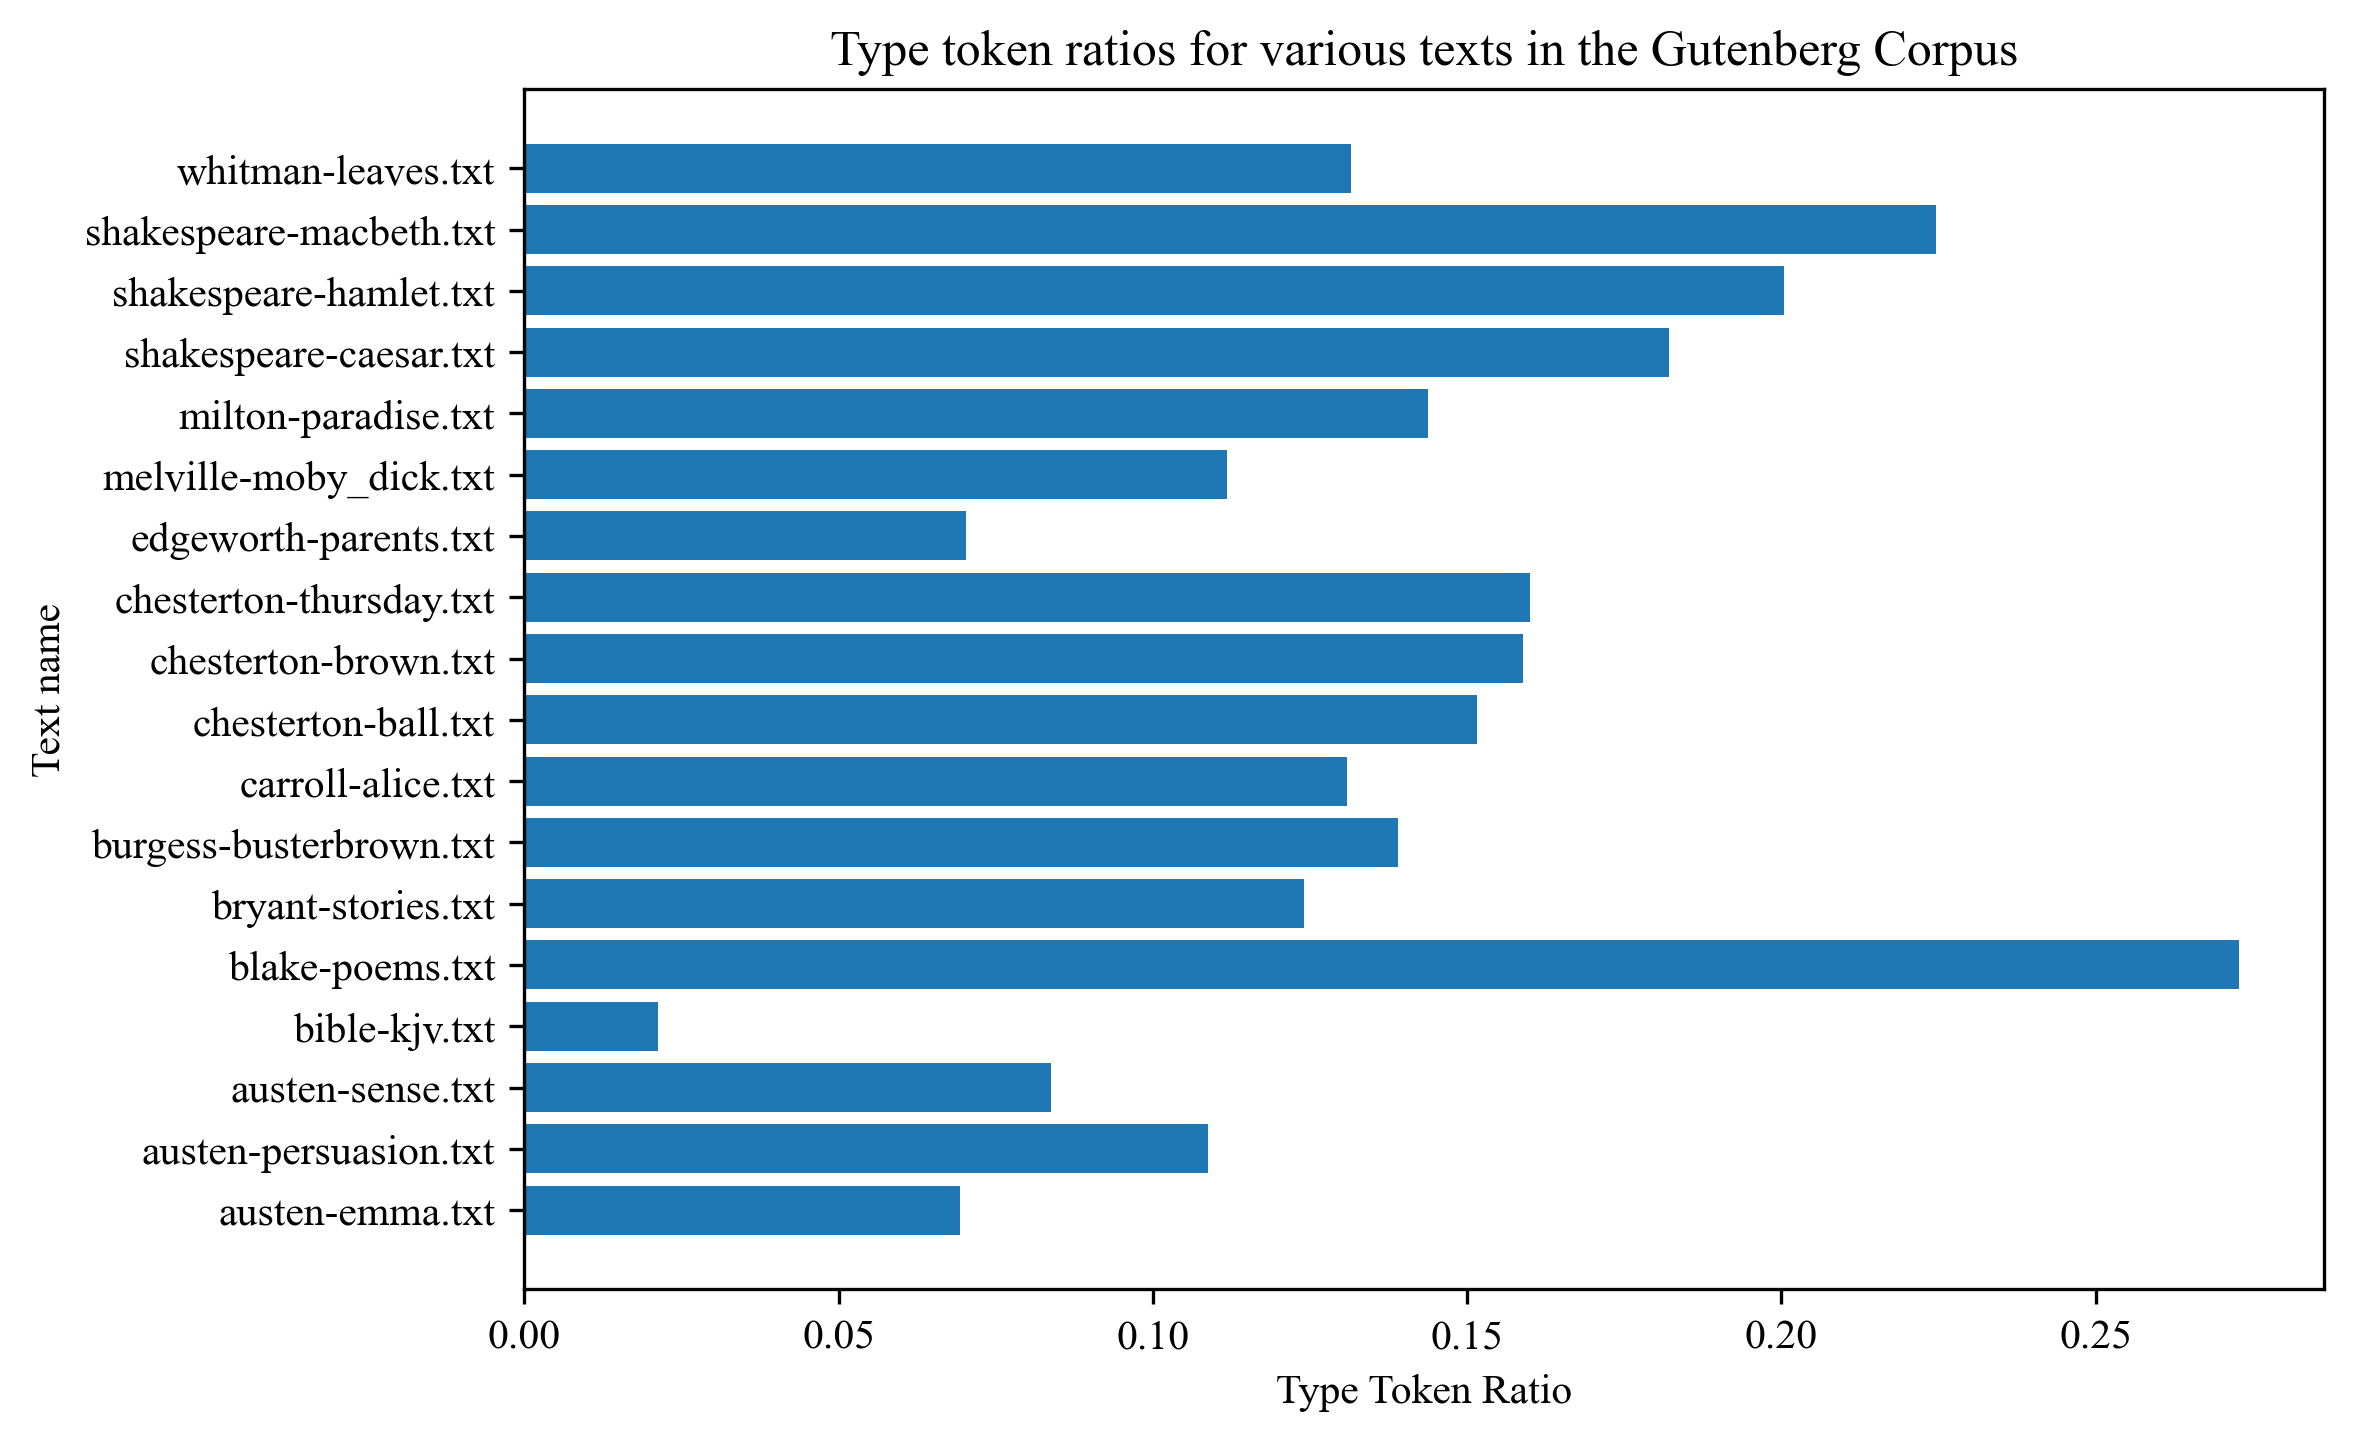

In [46]:
# Let us plot the type token ratios for each Text.

fig = plt.figure( dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.barh(text_names, ttrs)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

plt.title('Type token ratios for various texts in' \
           +' the Gutenberg Corpus',**csfont)
plt.xlabel('Type Token Ratio', **hfont)
plt.ylabel("Text name", **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.show()
#plt.savefig("./PrecisionPlot.png",  bbox_inches='tight')

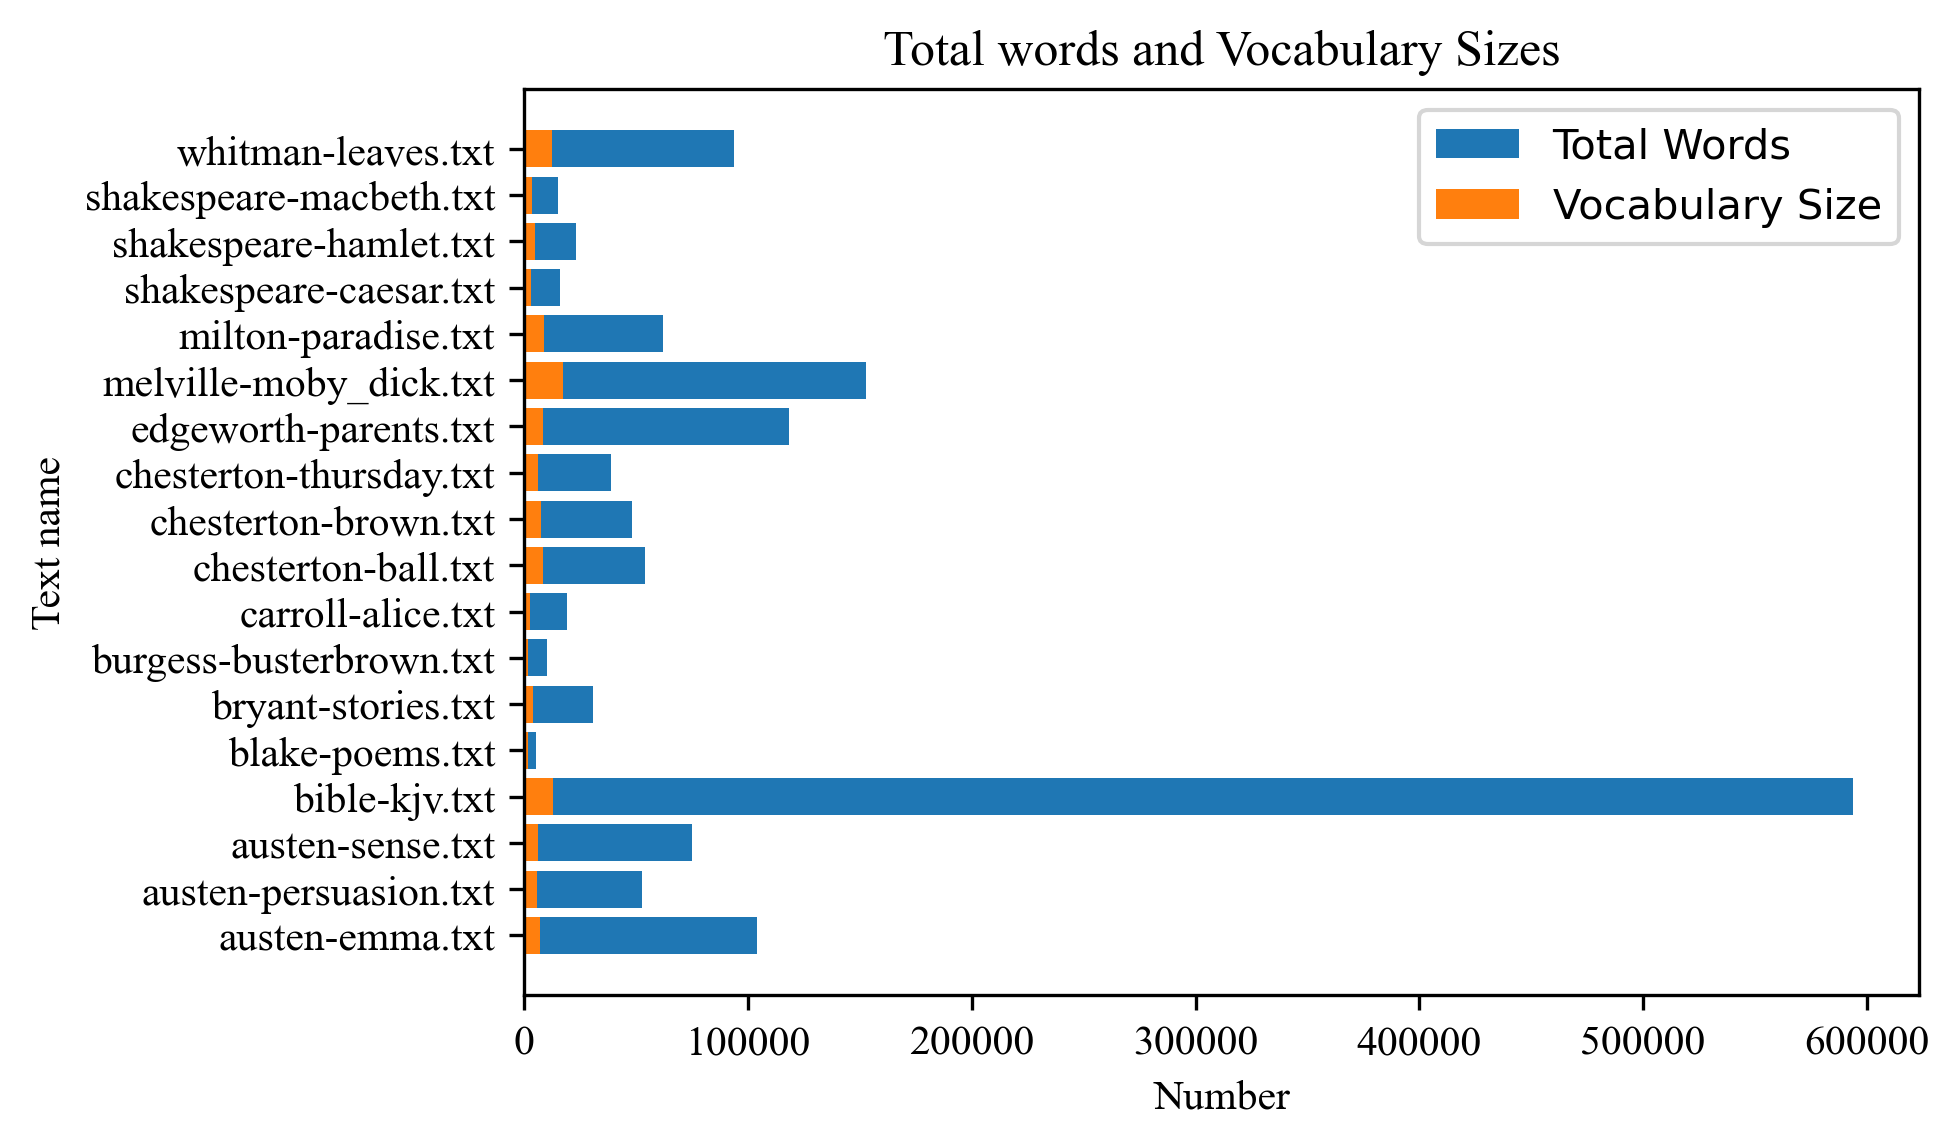

In [55]:
# We should also get plot the total number of words against the
# number of words in the vocabulary for each text.

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

ax.barh(text_names, tot_words, align='center', label='Total Words')
ax.barh(text_names, vocabs_lens, align='center', label='Vocabulary Size')

plt.title('Total words and Vocabulary Sizes', **csfont)
plt.xlabel('Number', **hfont)
plt.ylabel('Text name', **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

#plt.tight_layout()
plt.legend()
plt.show()

We can see there is a huge disparity between the number of words in each of the texts. Therefore we consider a fixed number of words for each of the text and check the type token ratio for them, this gives us a better understanding of the actual vocabulary density in the text.

In [56]:
TOTAL_WORDS = 15000

In [57]:
# We fix the total number of words and do the same analysis.
text_names = []
ttrs = []
tot_words = []
vocabs_lens = []

for text in tqdm(nltk.corpus.gutenberg.fileids()):
    text_names.append(text)
    
    words = nltk.Text(nltk.corpus.gutenberg.words(text))
    words = [word.lower() for word in words \
             if word.lower() not in stop_words][:TOTAL_WORDS]
    type_token_ratio = len(set(words)) / len(words)
    
    ttrs.append(type_token_ratio)
    tot_words.append(len(words))
    vocabs_lens.append(len(set(words)))

100%|██████████| 18/18 [00:04<00:00,  3.90it/s]


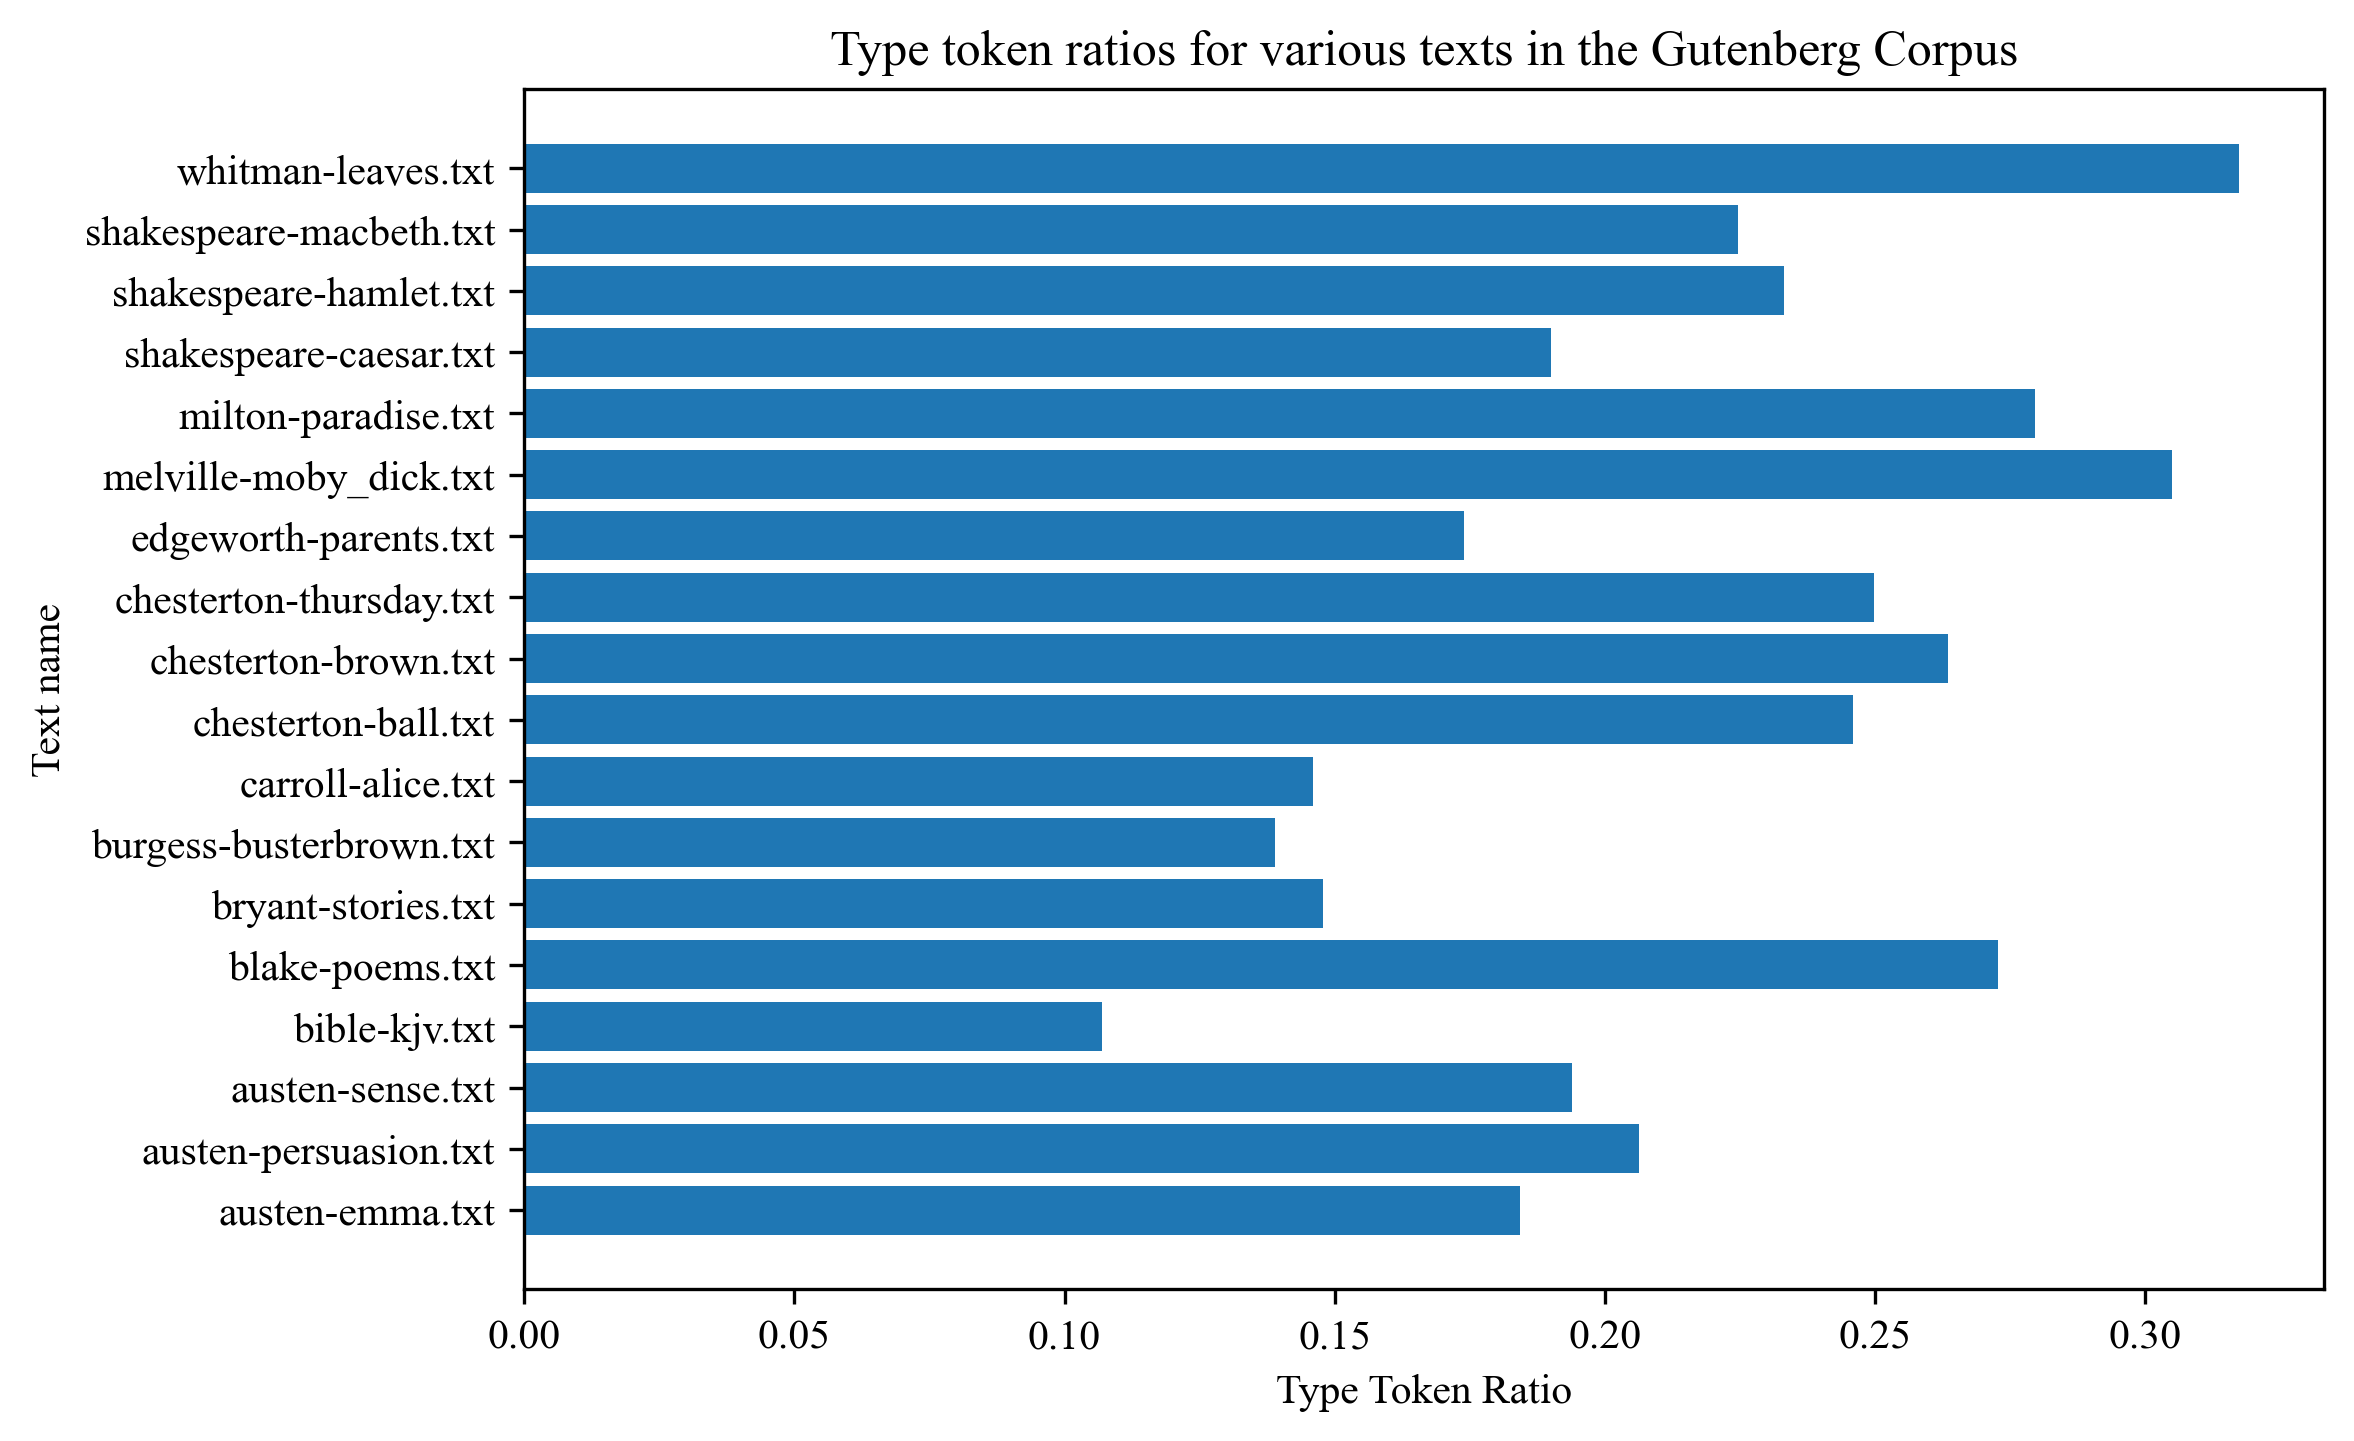

In [58]:
# Let us plot the type token ratios for each Text.

fig = plt.figure( dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.barh(text_names, ttrs)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

plt.title('Type token ratios for various texts in' \
           +' the Gutenberg Corpus',**csfont)
plt.xlabel('Type Token Ratio', **hfont)
plt.ylabel("Text name", **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.show()

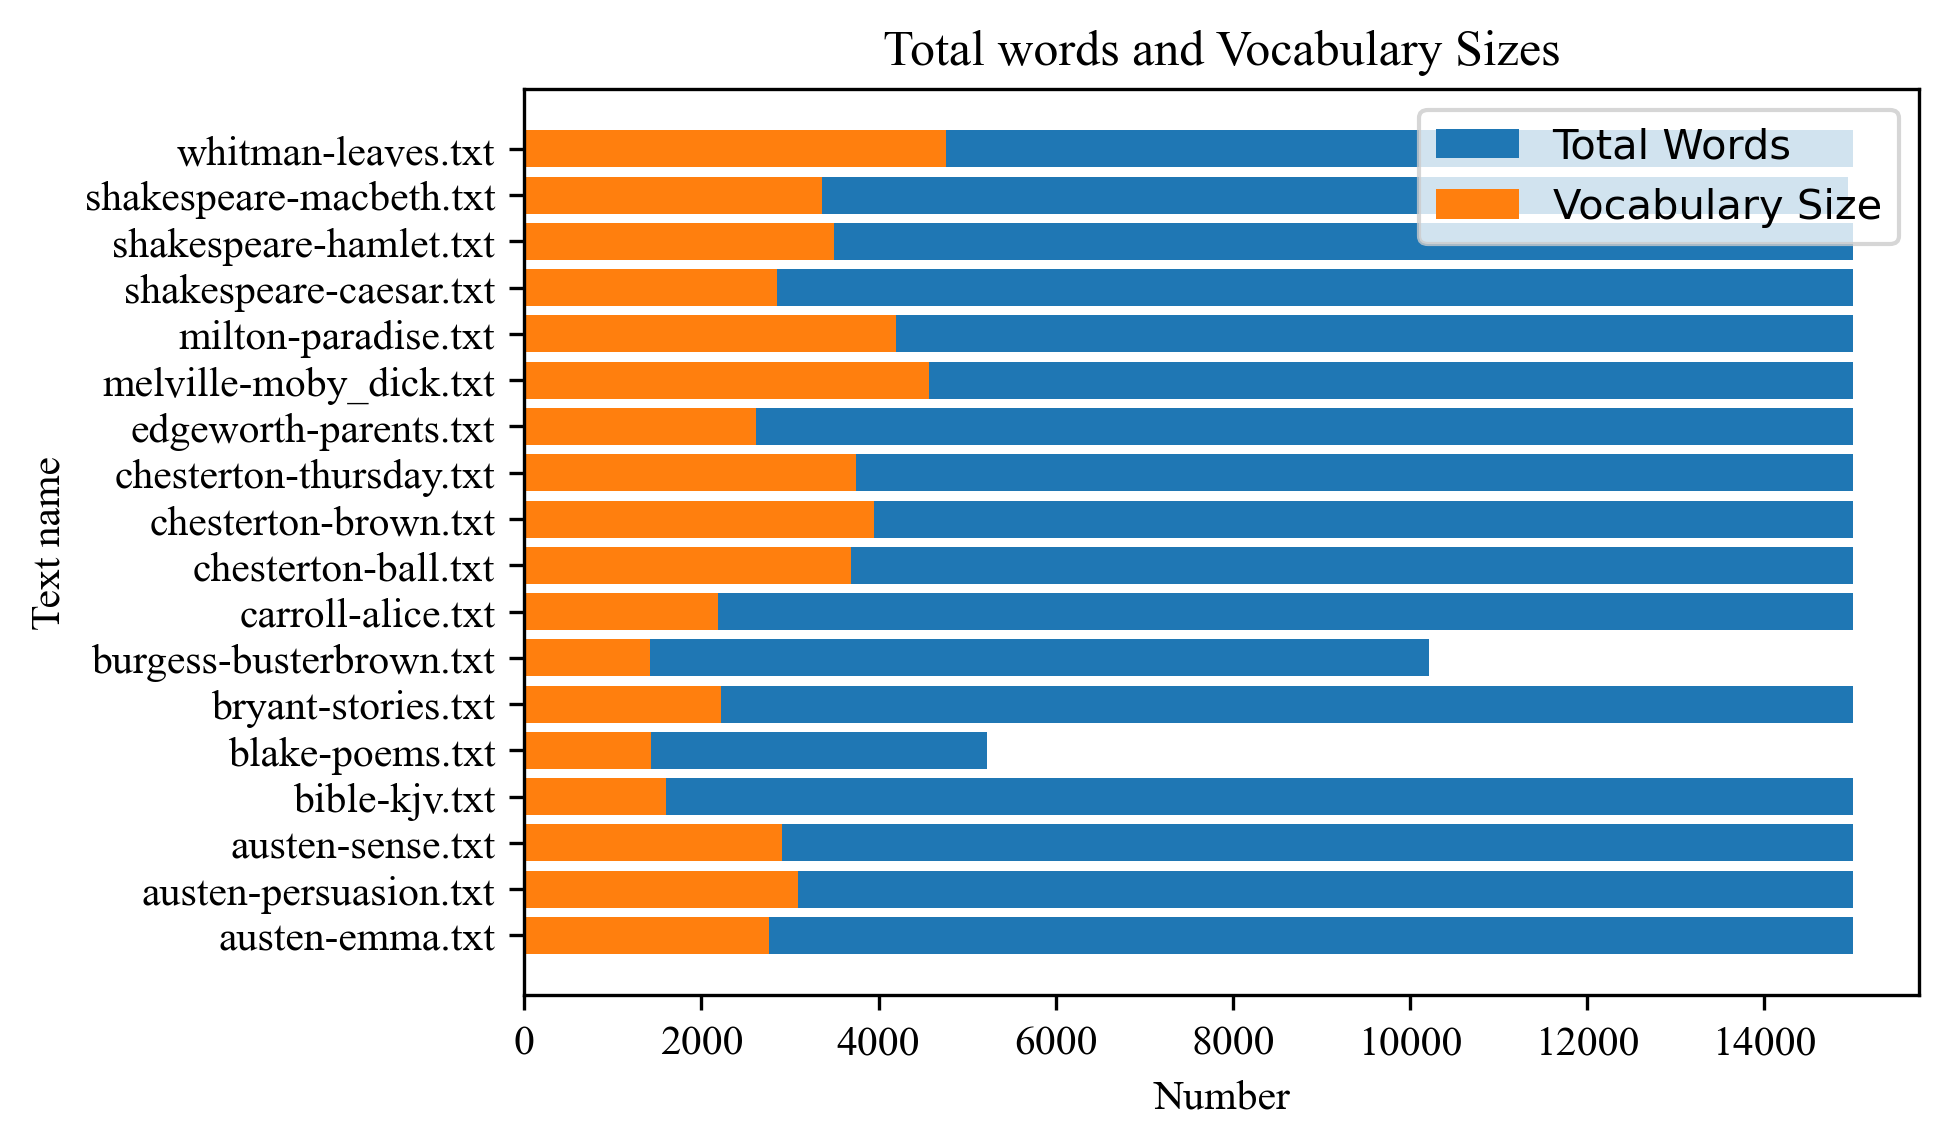

In [59]:
# We should also get plot the total number of words against the
# number of words in the vocabulary for each text.

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

ax.barh(text_names, tot_words, align='center', label='Total Words')
ax.barh(text_names, vocabs_lens, align='center', label='Vocabulary Size')

plt.title('Total words and Vocabulary Sizes', **csfont)
plt.xlabel('Number', **hfont)
plt.ylabel('Text name', **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

#plt.tight_layout()
plt.legend()
plt.show()

We now want to verify Zipf's law, which states that $\textit{The frequency of any word is inversely proportional to its rank in the frequency table}$ and can be written mathematically as : $$f(r) \propto \frac{1}{r^{\alpha}}$$
Where $\alpha \approx 1$.

To verify this we go through a corpus and plot the values of the product of the frequency and rank for all the words in the vocabulary.

``Note: We do not remove stopwords for veryfying these empirical formulae.``

In [112]:
P = [] # Stores the rank-frequency products for different texts.
R = [] # Stores the ranks for different texts.
lR = [] # Stores the log(ranks) for different texts.
F = [] # Stores the log(frequency) for different texts.

for text in tqdm(nltk.corpus.gutenberg.fileids()):
    
    words = nltk.Text(nltk.corpus.gutenberg.words(text))
    words = [word.lower() for word in words if word.isalpha()]

    # Generate the frequency distribution for the words.
    fDist = FreqDist(words)
    
    prods = []
    ranks = []
    lranks = []
    freqs = []
    for rank, word in enumerate(fDist):
        freq = fDist[word] / len(words)

        prods.append(freq*(rank+1))
        ranks.append(rank+1)
        lranks.append(math.log(rank+1))
        freqs.append(math.log(freq))
    
    P.append(prods)
    R.append(ranks)
    F.append(freqs)
    lR.append(lranks)

100%|██████████| 18/18 [00:05<00:00,  3.23it/s]


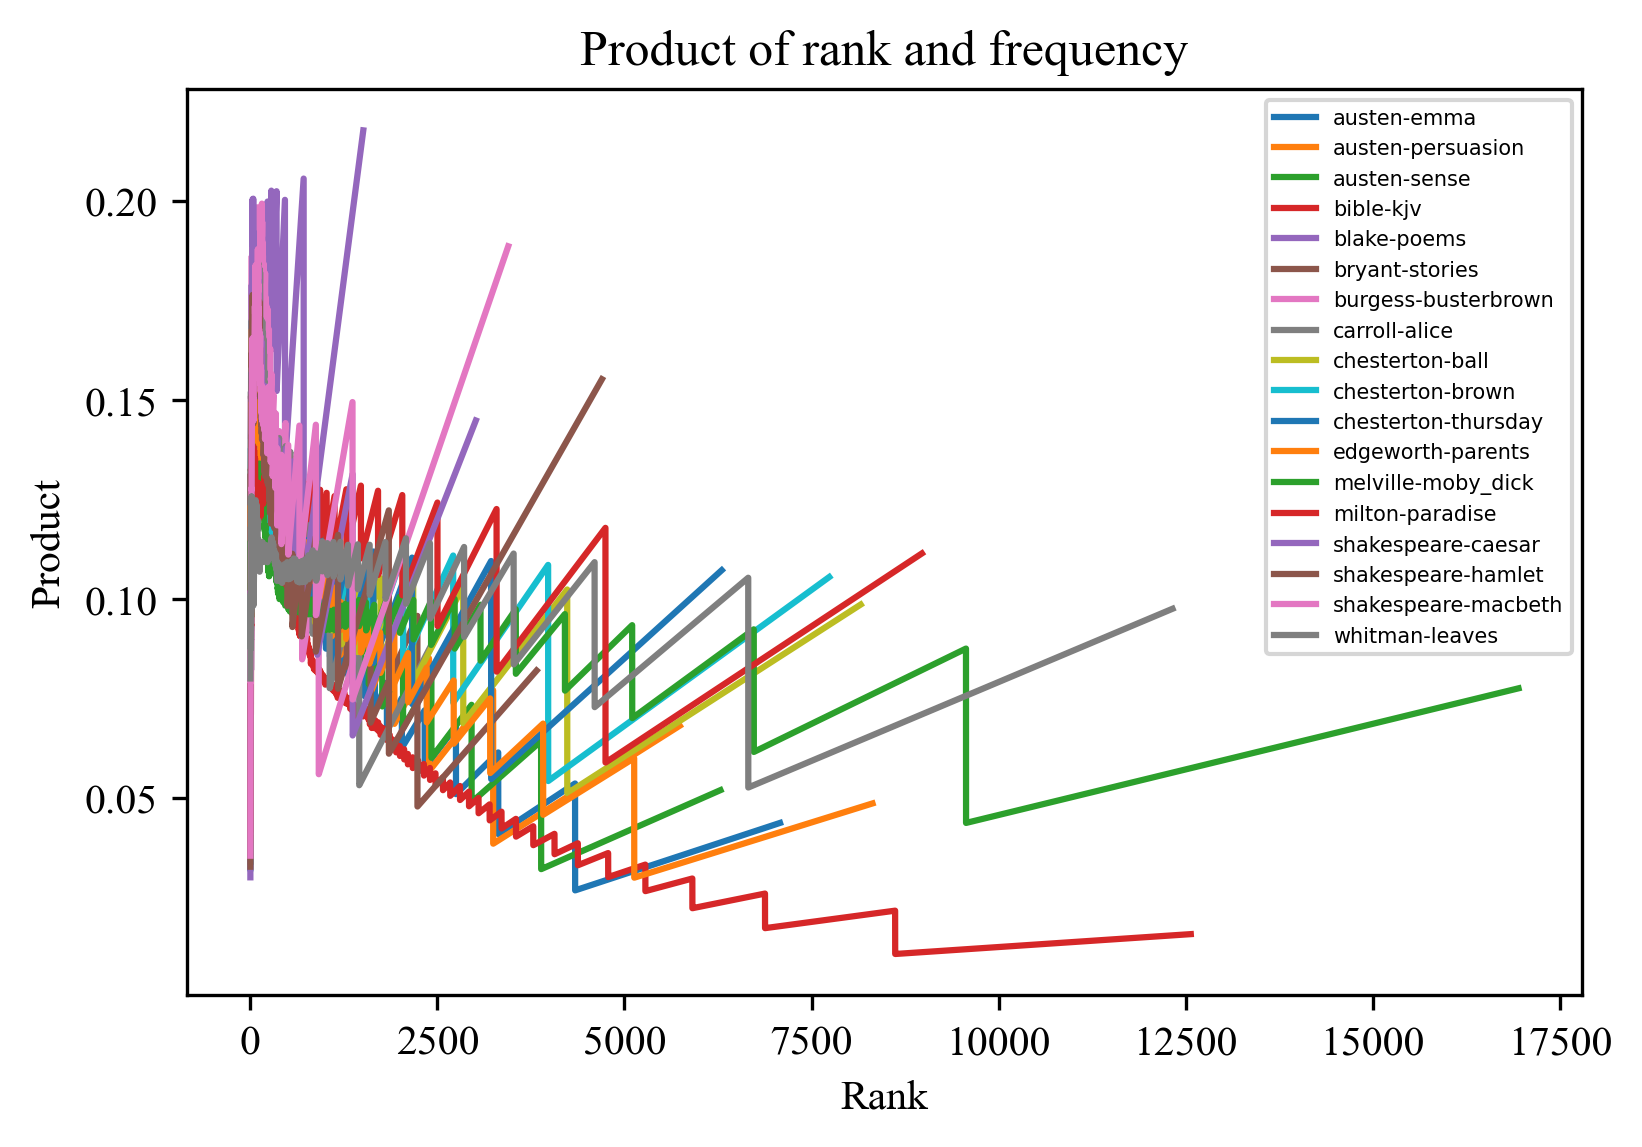

In [113]:
fig = plt.figure( dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

for i, text in enumerate(nltk.corpus.gutenberg.fileids()):
    ax.plot(R[i], P[i], label=text[:-4])

plt.title('Product of rank and frequency', **csfont)
plt.xlabel('Rank', **hfont)
plt.ylabel('Product', **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.legend(fontsize=5)
plt.show()

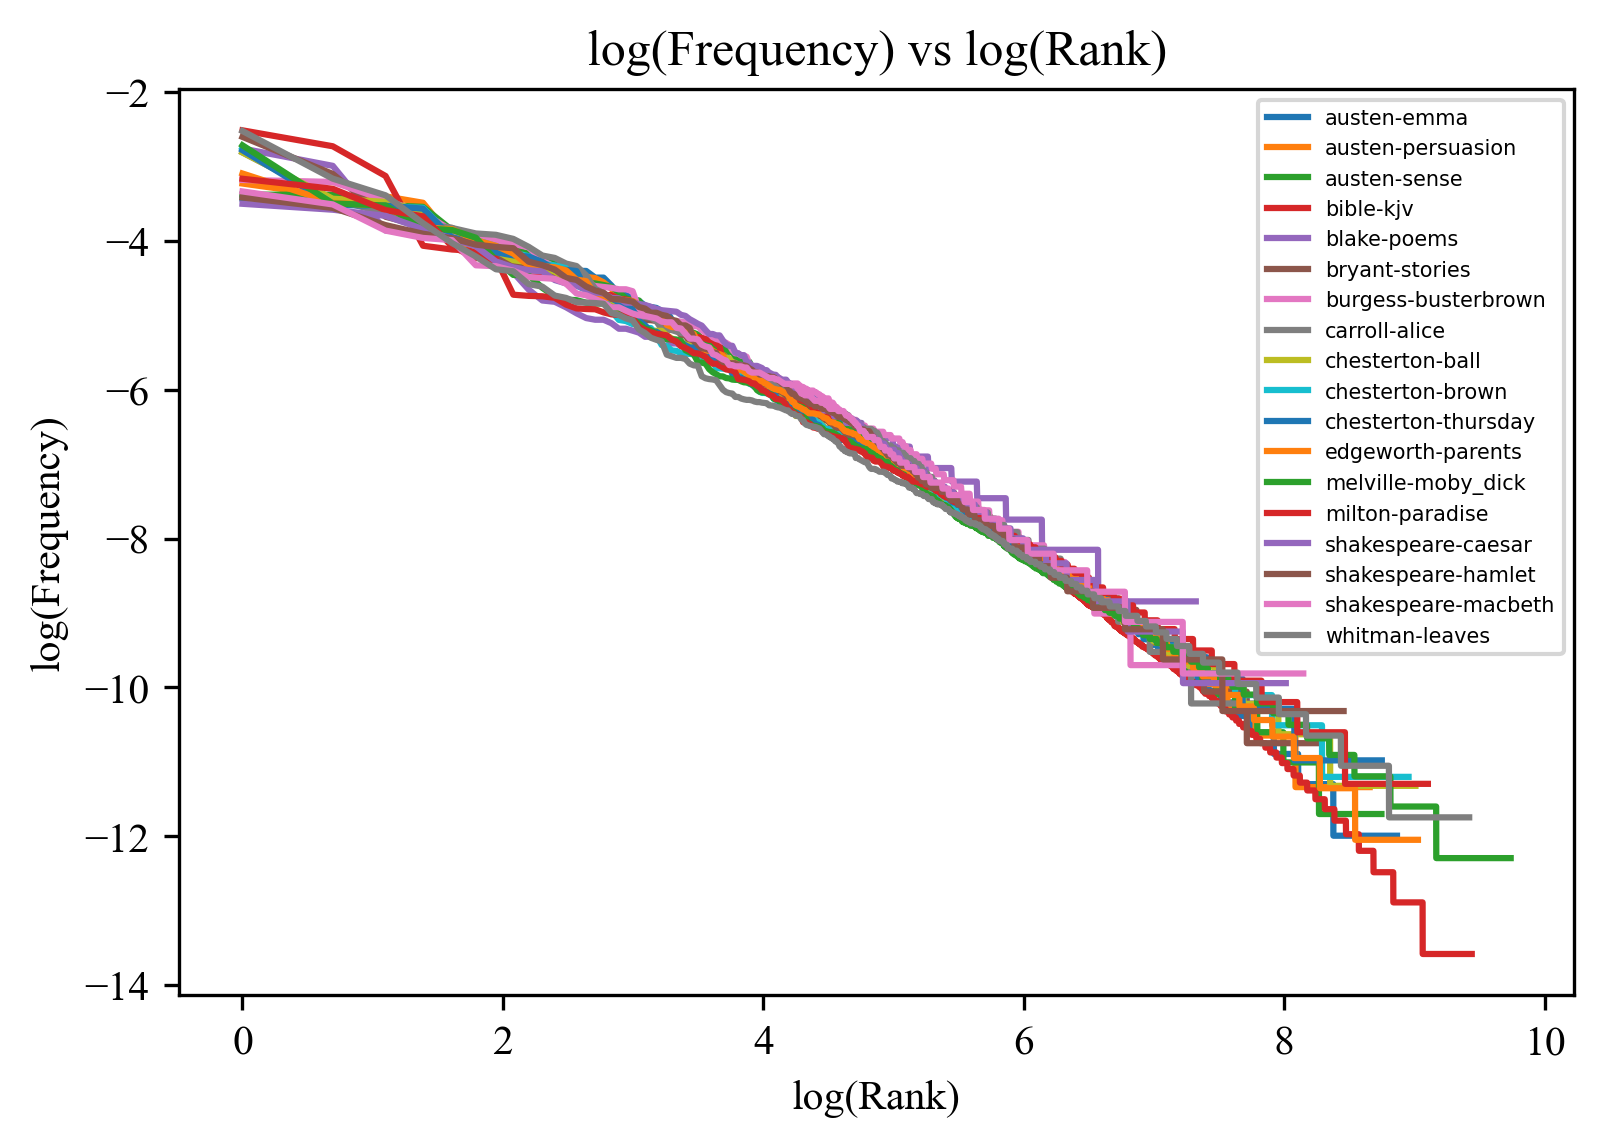

In [120]:
fig = plt.figure( dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

for i, text in enumerate(nltk.corpus.gutenberg.fileids()):
    ax.plot(lR[i], F[i], label=text[:-4])

plt.title('log(Frequency) vs log(Rank)', **csfont)
plt.xlabel('log(Rank)', **hfont)
plt.ylabel('log(Frequency)', **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.legend(fontsize=5)
plt.show()

Next we try to show the Mandelbrot approximation for the relation between frequency and rank which is shown by the following formula $$f(r) \propto \frac{1}{(r + \beta)^{\alpha}}$$

Where $\alpha \approx 1$ and $\beta \approx 2.7$

We can show it simply by adding 2.7 to the initial rank.

``Note: We do not remove stopwords for veryfying these empirical formulae.``

In [121]:
P = [] # Stores the rank-frequency products for different texts.
R = [] # Stores the ranks for different texts.
lR = [] # Stores the log(ranks) for different texts.
F = [] # Stores the log(frequency) for different texts.

for text in tqdm(nltk.corpus.gutenberg.fileids()):
    
    words = nltk.Text(nltk.corpus.gutenberg.words(text))
    words = [word.lower() for word in words if word.isalpha()]

    # Generate the frequency distribution for the words.
    fDist = FreqDist(words)
    
    prods = []
    ranks = []
    lranks = []
    freqs = []
    for rank, word in enumerate(fDist):
        freq = fDist[word] / len(words)

        prods.append(freq*(rank + 1 + 2.7))
        ranks.append(rank+1)
        lranks.append(math.log(rank + 1 + 2.7))
        freqs.append(math.log(freq))
    
    P.append(prods)
    R.append(ranks)
    F.append(freqs)
    lR.append(lranks)

100%|██████████| 18/18 [00:05<00:00,  3.10it/s]


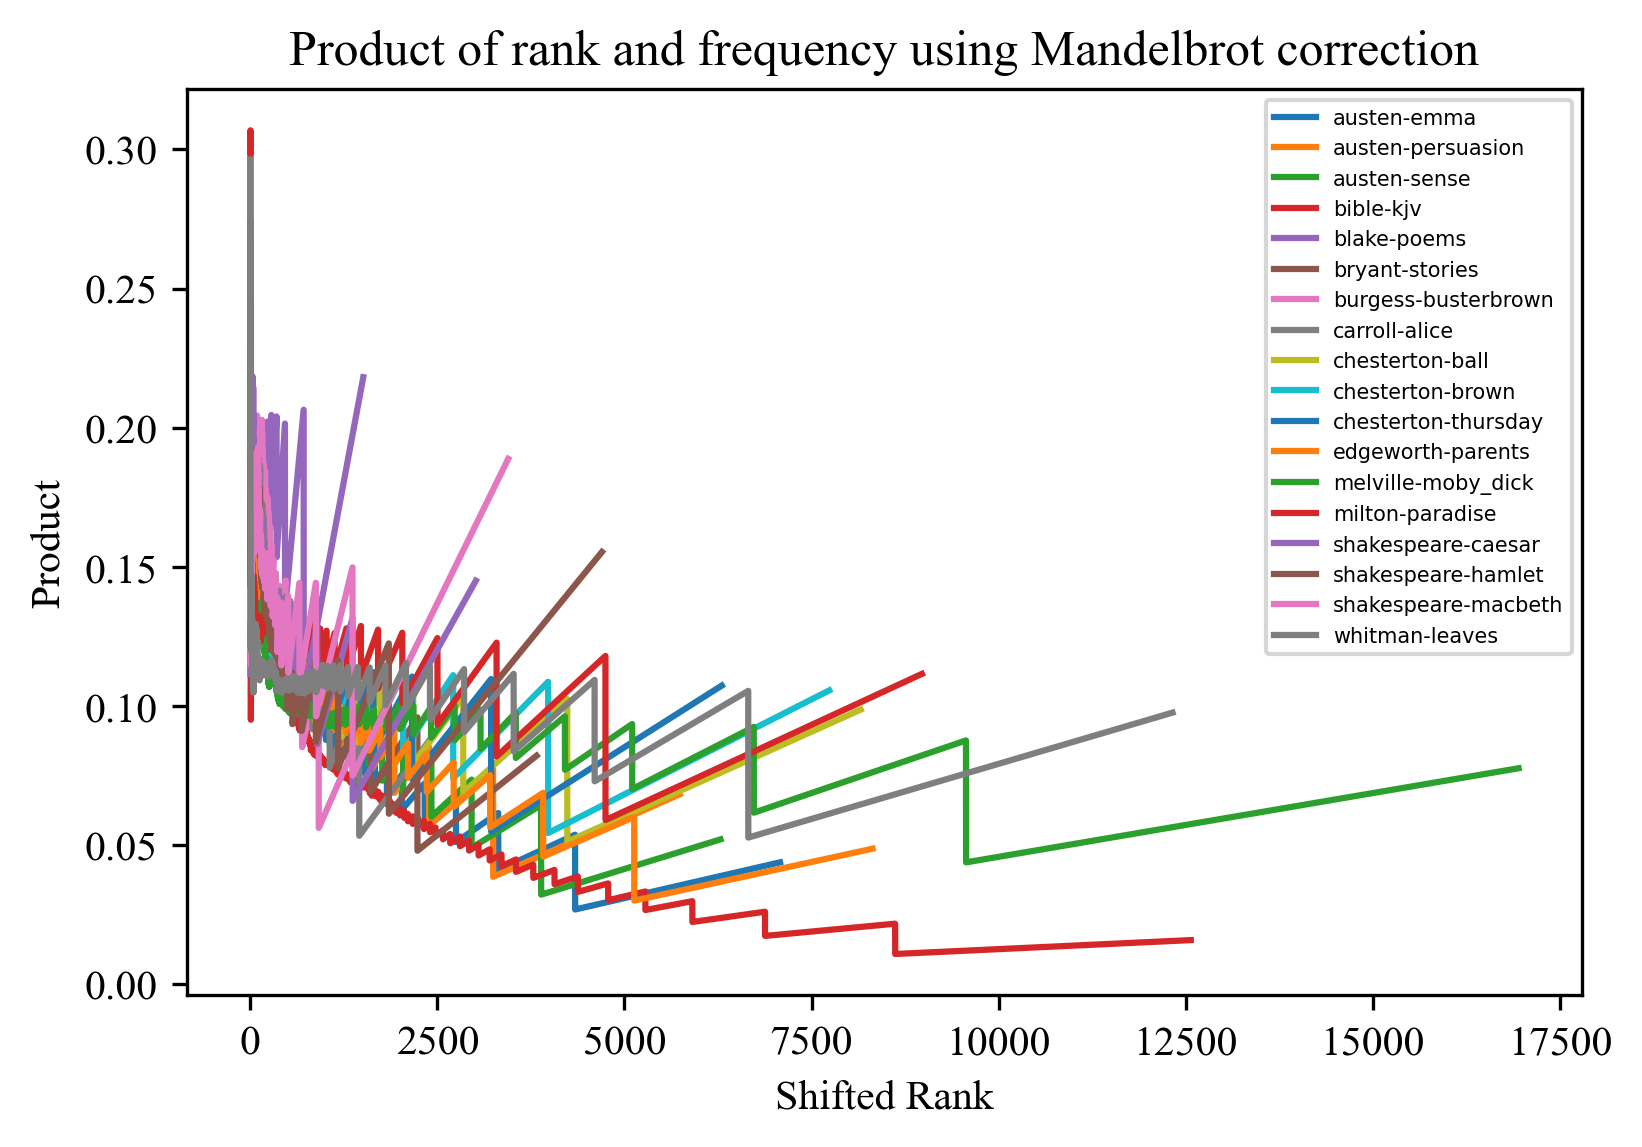

In [122]:
fig = plt.figure( dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

for i, text in enumerate(nltk.corpus.gutenberg.fileids()):
    ax.plot(R[i], P[i], label=text[:-4])

plt.title('Product of rank and frequency using Mandelbrot correction', **csfont)
plt.xlabel('Shifted Rank', **hfont)
plt.ylabel('Product', **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.legend(fontsize=5)
plt.show()

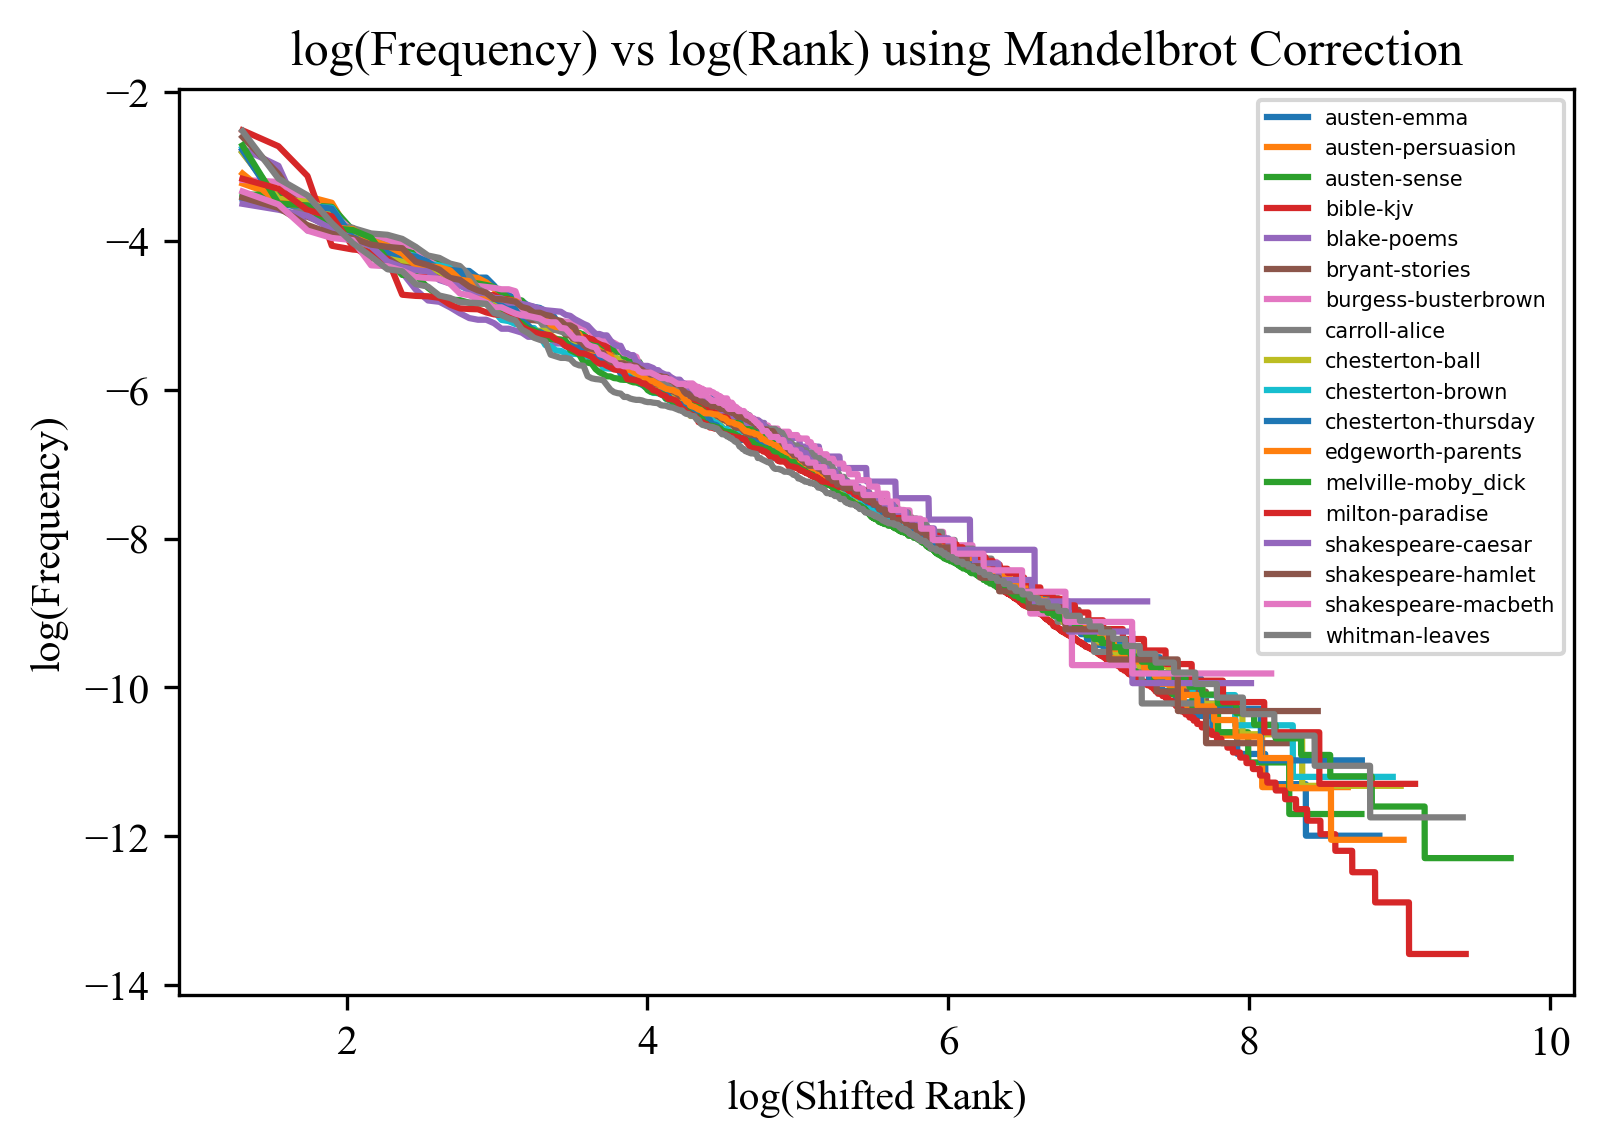

In [123]:
fig = plt.figure( dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

for i, text in enumerate(nltk.corpus.gutenberg.fileids()):
    ax.plot(lR[i], F[i], label=text[:-4])

plt.title('log(Frequency) vs log(Rank) using Mandelbrot Correction', **csfont)
plt.xlabel('log(Shifted Rank)', **hfont)
plt.ylabel('log(Frequency)', **hfont)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.legend(fontsize=5)
plt.show()

Heaps law is another emperical law which states that the ratio of the logarithm of the number of unique terms (_denoted by M_) and the the logarithm of the total number of tokens (_denoted by T_) is approximately a constant. This can be written as follows.
$$\frac{log(M)}{log(T)} \propto b$$
or, 
$$M \propto T^b$$

For different texts in the Gutenberg corpus we plot the value of $\frac{log(M)}{log(T)}$ and see if it holds good.

``Note: We do not remove stopwords for veryfying these empirical formulae.``

In [132]:
text_names = []
ratio1 = []
ratio2 = []

for text in tqdm(nltk.corpus.gutenberg.fileids()):
    words = nltk.Text(nltk.corpus.gutenberg.words(text))
    words = [word.lower() for word in words if word.isalpha()]
    
    # Generate the frequency distribution for the words.
    fDist = FreqDist(words)
    
    ratio1.append(math.log(len(fDist)) / math.log(len(words)))
    ratio2.append(len(fDist) / len(words)**(0.49))
    text_names.append(text[:-4])

100%|██████████| 18/18 [00:05<00:00,  3.47it/s]


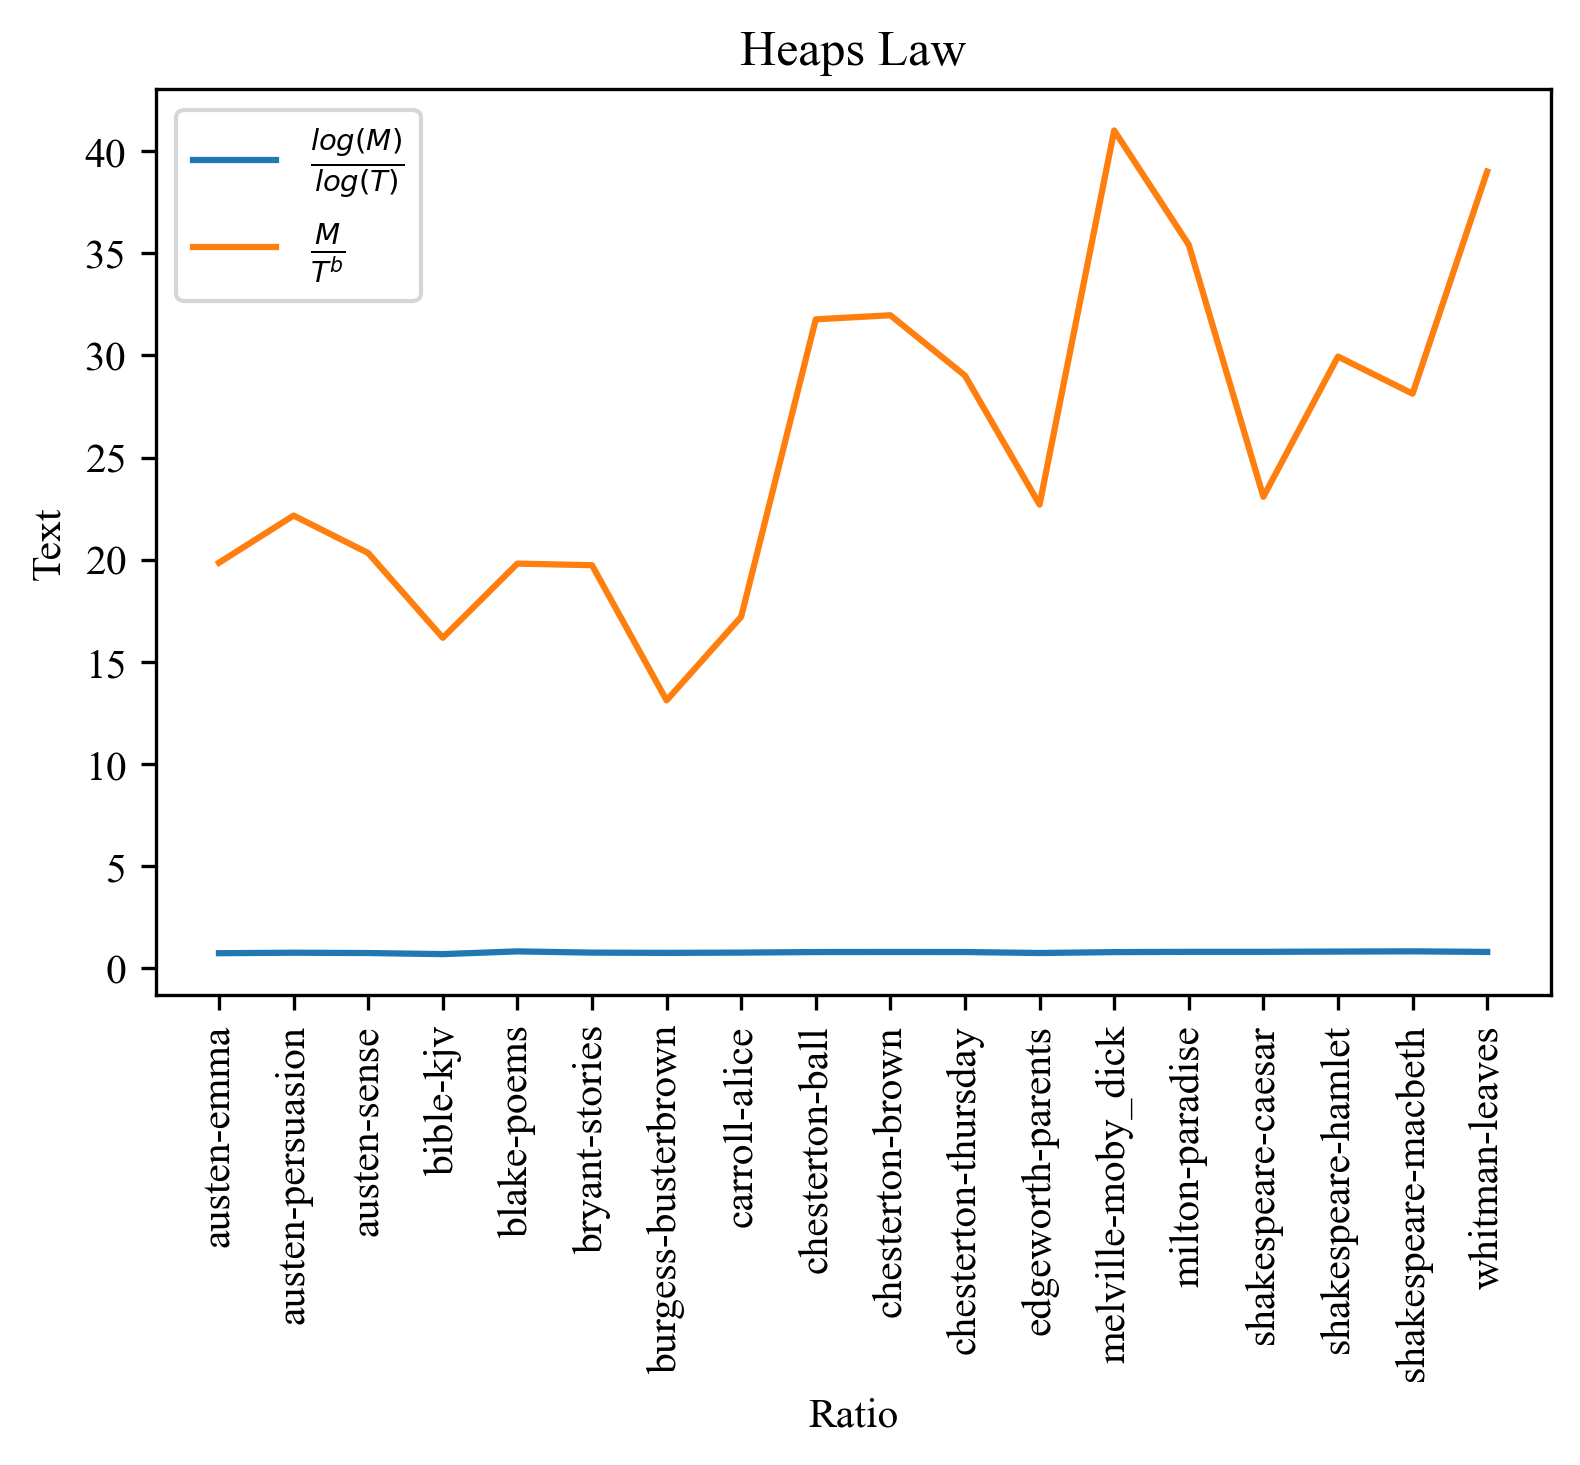

In [137]:
fig = plt.figure( dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

ax.plot(text_names, ratio1, label=r'$\frac{log(M)}{log(T)}$')
ax.plot(text_names, ratio2, label=r'$\frac{M}{T^b}$')


plt.title('Heaps Law', **csfont)
plt.xlabel('Ratio', **hfont)
plt.ylabel('Text', **hfont)
plt.xticks(rotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
    
plt.legend()
plt.show()

We can also try to predict the number of words in the vocabulary using Heaps law and check it against the real vocabulary sizes.

We are given that $30 \le k \le 100$ and $b \approx 0.49$. Using these parameters we see check how close the approximations given by Heaps Law are.

In [154]:
text_names = []
P = []

b = 0.49

for text in tqdm(nltk.corpus.gutenberg.fileids()):
    words = nltk.Text(nltk.corpus.gutenberg.words(text))
    words = [word.lower() for word in words if word.isalpha()]
    
    # Generate the frequency distribution for the words.
    fDist = FreqDist(words)
    
    text_names.append(text[:-4])
    
    preds = []
    for k in range(10, 100, 1):
        preds.append(len(fDist) - k*(len(words)**b))
    P.append(preds)

100%|██████████| 18/18 [00:05<00:00,  3.32it/s]


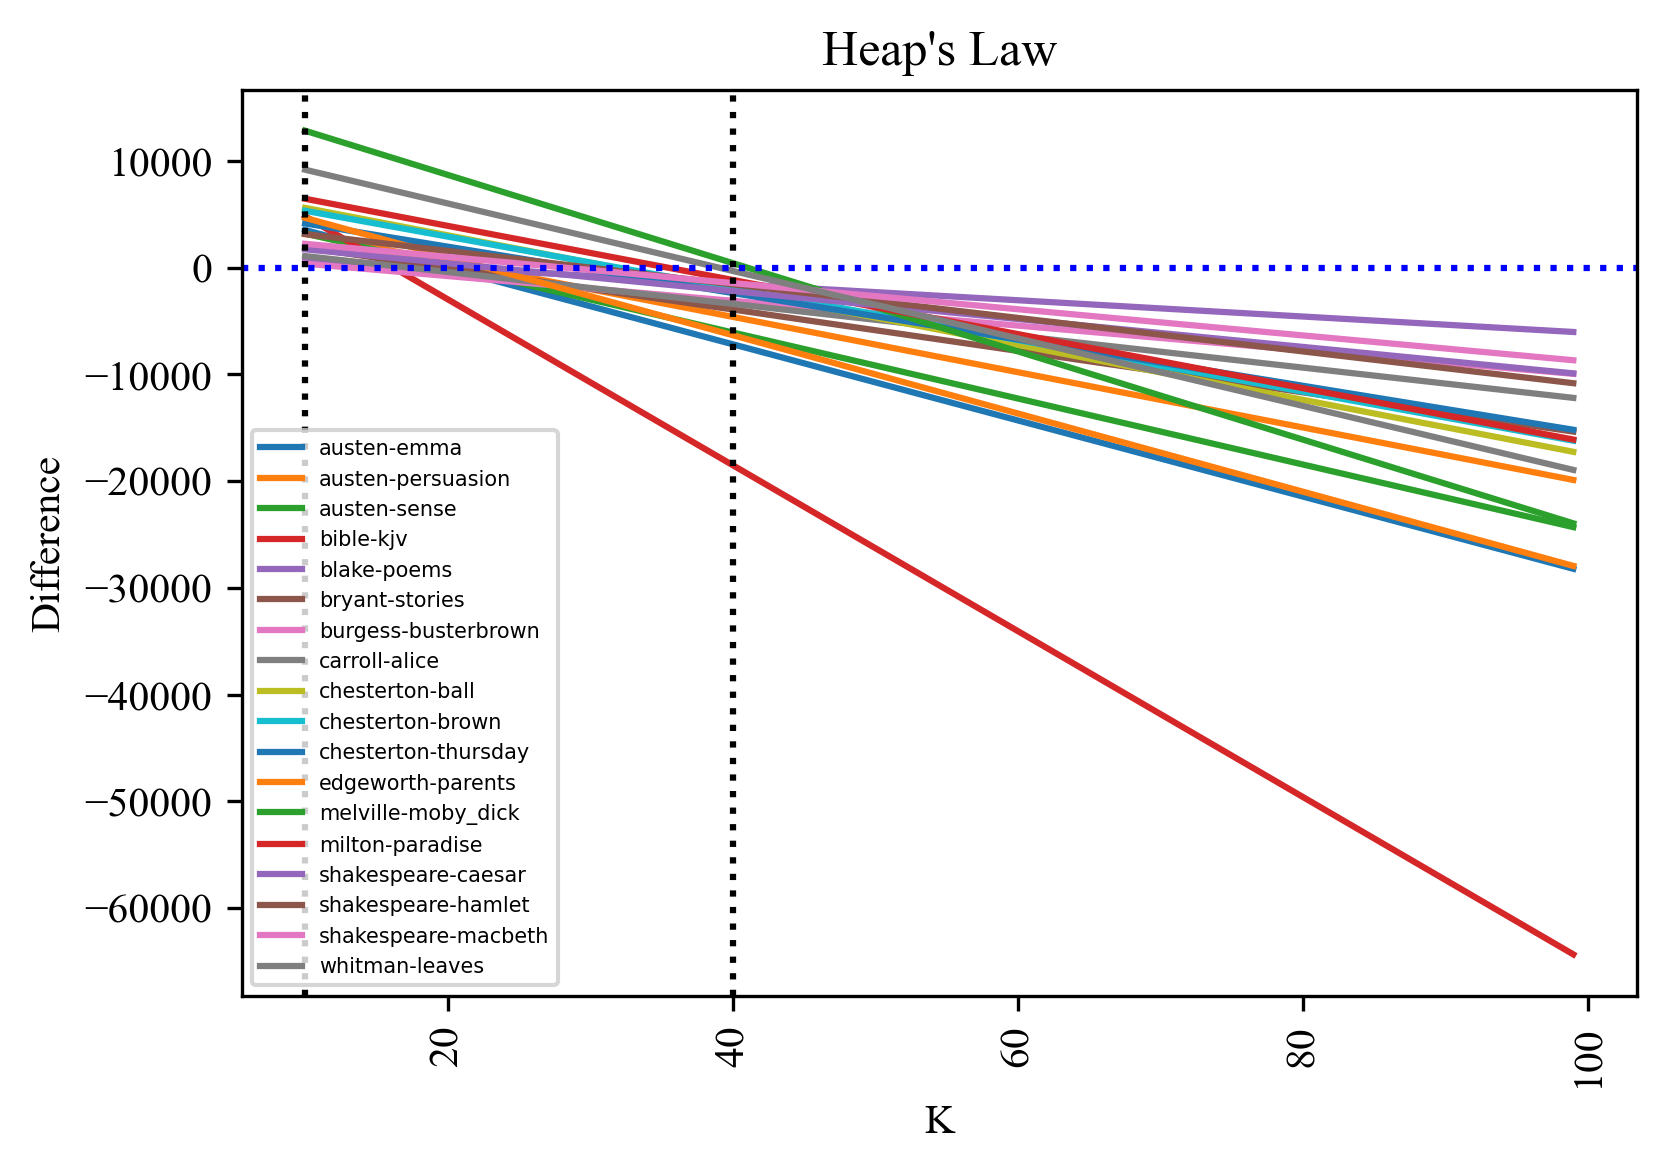

In [162]:
fig = plt.figure( dpi=300)
ax = fig.add_subplot(111)

csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

for i, each in enumerate(text_names):
    ax.plot(range(10, 100, 1), P[i], label=each)
    
plt.axhline(y=0, color='b', linestyle=':')
    
xcoords = [10, 40]
for xc in xcoords:
    ax.axvline(x=xc, linestyle=':', color='black')

plt.title("Heap's Law", **csfont)
plt.ylabel('Difference', **hfont)
plt.xlabel('K', **hfont)
plt.xticks(rotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
    
plt.legend(fontsize=5)
plt.show()